# New Section

In [ ]:

import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
import nltk
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
import pandas as pd
import sqlite3
import re
import os
import time
import matplotlib.pyplot as plt
#import nbconvert
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
%cd /gdrive/My Drive/SM_FRIEND_NEWSDATA

/gdrive/My Drive/SM_FRIEND_NEWSDATA


In [ ]:
data = pd.read_csv('Data_samitdata.csv').apply(lambda x: x.astype(str).str.lower())

In [ ]:
data.drop_duplicates(keep=False, inplace=True)

In [ ]:
pip install bnlp_toolkit

In [ ]:
stopwords = pd.read_csv('Stopwords.csv')

def to_encode(bangla_word):
    return bangla_word.encode('utf-8')


def to_decode(bangla_word):
    return bangla_word.decode('utf-8')

set_stop = set(stopwords['words'].map(to_encode))

In [ ]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()

texts = data['text'].values

In [ ]:
import re
def cleanhtml(sentence):
    cleanr = re.compile('/.*?')
    cleantext = re.sub(cleanr,' ',sentence)
    return cleantext
def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned)
    cleaned = re.sub(r'[A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z]', r'', cleaned1)
    cleaned1 = re.sub(r'[1|2|3|4|5|6|7|8|9|0]', r'', cleaned)
    return cleaned1

In [ ]:
def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    all_negative_words = []
    s=''

    for sentence in data:
        filtered_sentence = []

        for w in sentence.split():
            for cleaned_word in clean_punct(w).split():
                if len(cleaned_word)>2:
                    if(to_encode(cleaned_word) not in set_stop):
                        s = stemmer.stem_word(cleaned_word)
                        if len(s)>2:
                            final_words.append(s)
                            filtered_sentence.append(s)
                    else:
                        continue
                else:
                    continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [ ]:
X = pre_process(data['text'].values)
#Y = data['label'].values

In [ ]:
Y= pd.get_dummies(data['label'].values)

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state=42) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33,random_state=42) # this is random splitting

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42) # this is random splitting
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2,random_state=42) # this is random splitting

In [ ]:
#from nltk.tokenize import word_tokenize
#import nltk
from bnlp import NLTKTokenizer
bnltk = NLTKTokenizer()

def create_corpus(df):
    corpus = []  
    for text in X_train:
        words = [word.lower() for word in bnltk.word_tokenize(text)]
        #words = [word.lower() for word in word_tokenize(text)]
        corpus.append(words)
    return corpus    

In [ ]:
#import nltk
#nltk.download('punkt')
corpus = create_corpus(X_train)

In [ ]:
corpus[0]

['বিশ্বজিৎ',
 'কীভাব',
 'হত্যা',
 'আদাল',
 'বর্ণনা',
 'মামল',
 'তদন্ত',
 'কর্মকর্তা',
 'তাজুল',
 'ইসলাম',
 'গতকাল',
 'ঢাক',
 'দ্রুত',
 'বিচ',
 'ট্রাইব্যুনাল',
 'সাক্ষ্য',
 'সময়',
 'বর্ণনা',
 'মহানগর',
 'গোয়েন্দা',
 'পুলিশ',
 'পরিদর্শক',
 'তাজুল',
 'ইসলাম',
 'বিশ্বজিৎ',
 'দাস',
 'হত্যা',
 'মামল',
 'সর্বশেষ',
 'তদন্ত',
 'কর্মকর্তা',
 'ছাত্রলীগ',
 'কর্মী',
 'আসামি',
 'আদাল',
 'অভিযোগপত্র',
 'দেনসাক্ষ্য',
 'তাজুল',
 'ইসলাম',
 'মামল',
 'তদন্ত',
 'দায়িত্ব',
 'মামল',
 'কাগজপত্র',
 'গণমাধ্যম',
 'প্রকাশিত',
 'ভিডি',
 'স্থিরচিত্র',
 'পর্যালোচনা',
 'আসামি',
 'রাজন',
 'তালুকদ',
 'মাথায়',
 'সাদা',
 'টুপি',
 'মুখ',
 'রুমাল',
 'বাঁধা',
 'রক্তমাখা',
 'ছুরি',
 'আসামি',
 'রফিকুল',
 'ইসলাম',
 'ফুলহাতা',
 'শার্ট',
 'জিন্স',
 'প্যান্ট',
 'ভিডি',
 'ফুটেজ',
 'আসামি',
 'রফিকুল',
 'ইসলাম',
 'বিশ্বজিৎ',
 'এলোপাতাড়ি',
 'কুপিয়',
 'রক্তাক্ত',
 'আসামি',
 'খন্দক',
 'ইউনুস',
 'কাইয়ুম',
 'কাঠ',
 'রোল',
 'বিশ্বজিৎ',
 'পেটান',
 'একইভাব',
 'আসামি',
 'কীভাব',
 'বিশ্বজিৎ',
 'মারধর',
 'বর্ণনা']

In [ ]:
num_words = len(corpus)
print(num_words)

298969


In [ ]:
#max number of words in a seuence
max_length =300

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index
print(len(word_index))

1076550


In [ ]:
word_index

{'পুলিশ': 1,
 'গতকাল': 2,
 'বছর': 3,
 'কথা': 4,
 'নাম': 5,
 'দেশ': 6,
 'শেষ': 7,
 'টাকা': 8,
 'কর্মকর্তা': 9,
 'সাল': 10,
 'জানান': 11,
 'তিন': 12,
 'ইসলাম': 13,
 'রহমান': 14,
 'উপজেলা': 15,
 'ঘটনা': 16,
 'জেলা': 17,
 'গ্রাম': 18,
 'নির্বাচন': 19,
 'সদস্য': 20,
 'মামলা': 21,
 'উপজেল': 22,
 'বাংলাদেশ': 23,
 'ম্যাচ': 24,
 'নেতা': 25,
 'লীগ': 26,
 'অভিযোগ': 27,
 'হিসেব': 28,
 'সকাল': 29,
 'কমি': 30,
 'প্রধান': 31,
 'মানুষ': 32,
 'এলাকা': 33,
 'কারণ': 34,
 'বিরুদ্ধ': 35,
 'হোস': 36,
 'হাসপাতাল': 37,
 'সভাপতি': 38,
 'ওপর': 39,
 'সম্পাদক': 40,
 'মাস': 41,
 'বিভাগ': 42,
 'লাখ': 43,
 'কলেজ': 44,
 'অনুষ্ঠান': 45,
 'সূত্র': 46,
 'দিন': 47,
 'সরক': 48,
 'আলো': 49,
 'আওয়ামী': 50,
 'একজন': 51,
 'রান': 52,
 'বিষ': 53,
 'অংশ': 54,
 'থান': 55,
 'ব্যক্তি': 56,
 'ভারত': 57,
 'ইউনিয়ন': 58,
 'পাঁচ': 59,
 'খান': 60,
 'ব্যাংক': 61,
 'শিক্ষক': 62,
 'আদালত': 63,
 'সদর': 64,
 'সময়': 65,
 'বিএনপির': 66,
 'গ্রেপ্ত': 67,
 'আলী': 68,
 'বন্ধ': 69,
 'কর্মী': 70,
 'সরকারি': 71,
 'থাক': 72,
 'শিক্ষার্থী': 73,
 'শহর':

In [ ]:
train_sequences =  tokenizer.texts_to_sequences(X_train)

In [ ]:
train_sequences[0]

In [ ]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences,maxlen=max_length,padding="post",truncating="post")

In [ ]:
train_padded[0]

array([ 4238,   516,   131,   167,  2481,   158,   111,     9,  3213,
          13,     2,   215,   313,   381,   634,  1037,    65,  2481,
         301,  2080,     1,   865,  3213,    13,  4238,   936,   131,
         158,   577,   111,     9,   204,    70,   123,   167,  1174,
       85502,  3213,    13,   158,   111,   891,   158,  1807,   644,
         498,  1074, 15227,  2920,   123,  5865,  1409,  2564,  1504,
        7761,   214, 16525,  2921, 11795,  3952,   123,   819,    13,
       30642,  3445, 35930,  4797,  1074,  4009,   123,   819,    13,
        4238,  8810,  3651,  3996,   123,  1006,  3556,  7196,  2074,
        6568,  4238, 11251,  2605,   123,   516,  4238,   682,  2481,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
print(X_train[0])
print(train_sequences[0])

বিশ্বজিৎ কীভাব হত্যা আদাল বর্ণনা মামল তদন্ত কর্মকর্তা তাজুল ইসলাম গতকাল ঢাক দ্রুত বিচ ট্রাইব্যুনাল সাক্ষ্য সময় বর্ণনা মহানগর গোয়েন্দা পুলিশ পরিদর্শক তাজুল ইসলাম বিশ্বজিৎ দাস হত্যা মামল সর্বশেষ তদন্ত কর্মকর্তা ছাত্রলীগ কর্মী আসামি আদাল অভিযোগপত্র দেনসাক্ষ্য তাজুল ইসলাম মামল তদন্ত দায়িত্ব মামল কাগজপত্র গণমাধ্যম প্রকাশিত ভিডি স্থিরচিত্র পর্যালোচনা আসামি রাজন তালুকদ মাথায় সাদা টুপি মুখ রুমাল বাঁধা রক্তমাখা ছুরি আসামি রফিকুল ইসলাম ফুলহাতা শার্ট জিন্স প্যান্ট ভিডি ফুটেজ আসামি রফিকুল ইসলাম বিশ্বজিৎ এলোপাতাড়ি কুপিয় রক্তাক্ত আসামি খন্দক ইউনুস কাইয়ুম কাঠ রোল বিশ্বজিৎ পেটান একইভাব আসামি কীভাব বিশ্বজিৎ মারধর বর্ণনা
[4238, 516, 131, 167, 2481, 158, 111, 9, 3213, 13, 2, 215, 313, 381, 634, 1037, 65, 2481, 301, 2080, 1, 865, 3213, 13, 4238, 936, 131, 158, 577, 111, 9, 204, 70, 123, 167, 1174, 85502, 3213, 13, 158, 111, 891, 158, 1807, 644, 498, 1074, 15227, 2920, 123, 5865, 1409, 2564, 1504, 7761, 214, 16525, 2921, 11795, 3952, 123, 819, 13, 30642, 3445, 35930, 4797, 1074, 4009, 123, 819, 13, 

In [ ]:
word_index["বাংলাদেশ"]

23

In [ ]:
print(f"shape of train {train_padded.shape}")

shape of train (298969, 300)


In [ ]:
print(f"shape of trainLlabel {y_train.shape}")

shape of trainLlabel (298969, 5)


In [ ]:
reverse_word_index = dict([(key,value) for (value,key) in word_index.items()])

In [ ]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [ ]:
decode(train_sequences[0])

'বিশ্বজিৎ কীভাব হত্যা আদাল বর্ণনা মামল তদন্ত কর্মকর্তা তাজুল ইসলাম গতকাল ঢাক দ্রুত বিচ ট্রাইব্যুনাল সাক্ষ্য সময় বর্ণনা মহানগর গোয়েন্দা পুলিশ পরিদর্শক তাজুল ইসলাম বিশ্বজিৎ দাস হত্যা মামল সর্বশেষ তদন্ত কর্মকর্তা ছাত্রলীগ কর্মী আসামি আদাল অভিযোগপত্র দেনসাক্ষ্য তাজুল ইসলাম মামল তদন্ত দায়িত্ব মামল কাগজপত্র গণমাধ্যম প্রকাশিত ভিডি স্থিরচিত্র পর্যালোচনা আসামি রাজন তালুকদ মাথায় সাদা টুপি মুখ রুমাল বাঁধা রক্তমাখা ছুরি আসামি রফিকুল ইসলাম ফুলহাতা শার্ট জিন্স প্যান্ট ভিডি ফুটেজ আসামি রফিকুল ইসলাম বিশ্বজিৎ এলোপাতাড়ি কুপিয় রক্তাক্ত আসামি খন্দক ইউনুস কাইয়ুম কাঠ রোল বিশ্বজিৎ পেটান একইভাব আসামি কীভাব বিশ্বজিৎ মারধর বর্ণনা'

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)

test_padded = pad_sequences(test_sequences,maxlen=max_length,padding="post",truncating="post" )

In [ ]:
print(f"shape of test {test_padded.shape}")
print(f"shape of testLlabel {y_test.shape}")

shape of test (74743, 300)
shape of testLlabel (74743, 5)


In [ ]:
embedding_dict = {}
#with open("bn_glove.39M.100d.txt", "r") as f:
with open("bn_glove.39M.300d.txt", "r") as f:  
    for line in f:
        values = line.split() 
        word = values[0]
        vectors = np.asarray(values[1:], "float32")  
        embedding_dict[word] = vectors
f.close()        

In [ ]:
embedding_dict

{'ও': array([ 0.610642,  0.166818,  0.295577, -1.137047,  0.067592, -0.414454,
        -0.629165, -0.322823, -0.636748, -0.971432, -1.201669, -0.861938,
        -0.969887, -1.108881, -0.93755 ,  1.356564, -0.257033,  0.891872,
         1.570158,  0.9383  ,  0.478883, -0.808275, -0.937492, -0.142058,
         1.293873,  0.893855,  1.850441,  0.2925  ,  0.457514,  0.521983,
         0.080185, -1.052115, -1.594284,  0.019237,  0.450335, -0.643853,
        -0.338574,  1.172694,  0.376899, -1.485899, -0.393413, -0.051892,
        -0.234974, -0.447829, -1.254591,  0.869817,  0.862096,  0.559294,
        -0.409443, -0.037444,  0.748934, -0.839027,  0.470058,  0.126435,
        -1.445679,  0.689844,  0.536178, -0.099632,  0.197933,  0.065726,
         0.4386  , -0.454607, -0.408472,  0.07783 , -0.653886,  0.142091,
        -0.966338,  1.460963,  0.488321, -0.79725 , -1.14029 ,  0.021589,
         1.40929 , -0.938192,  0.152994,  0.64821 , -0.742985,  0.227626,
        -1.235647, -0.284045, -0.

In [ ]:
#create embedding matrix

num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words,100))

for word, i in word_index.items():
    if i < num_words:
        emb_vec = embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i] = emb_vec


In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.25053099, -0.219382  ,  0.387595  , ...,  0.37400201,
         0.244266  , -0.194894  ],
       [ 0.32739401, -0.086074  , -0.29790601, ...,  0.38150001,
         0.64514703,  0.419027  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
word_index['অফিস']

929

In [ ]:
embedding_dict.get("অফিস")

array([ 0.254753,  0.032202,  1.096008, -1.14448 , -0.116052, -0.131192,
       -0.192126, -0.313051, -0.020078, -0.058117, -0.26145 , -0.090306,
       -1.032835, -0.25486 ,  0.744515,  0.665015,  0.027279,  0.804755,
        1.074641, -0.5454  ,  1.094944,  0.612413, -0.366484, -0.644679,
        0.182529,  0.308715,  0.420312,  0.687468,  0.074513,  0.793401,
        0.285758,  0.407524,  0.592798, -0.013033,  0.424918,  0.491449,
       -0.350754, -0.356248,  0.815246, -0.399677,  0.323945,  0.251974,
       -0.707687,  0.109197,  0.183427,  0.094513,  0.586597,  0.440766,
        0.159752, -0.260783,  1.045259,  0.241894, -0.462282,  0.07869 ,
       -0.631197,  0.562866,  0.103332,  0.819717, -0.020874, -0.342439,
        0.022972,  0.117918, -0.278581,  0.301535, -0.126329, -0.159137,
       -0.364303,  1.009639,  0.248677, -0.725712, -0.681625,  0.538954,
        0.601494,  0.586196, -0.645067,  0.524251, -0.063384,  0.749431,
        0.309466, -0.649449, -0.367574, -0.204483, 

In [ ]:
(embedding_matrix[929] == embedding_dict.get("অফিস")).all()

True

In [ ]:
#baseline model with glove

from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras.initializers import Constant
from keras.models import Sequential

model = Sequential()

model.add(
    Embedding(
        num_words,
        100,
        embeddings_initializer = Constant(embedding_matrix),
        input_length = max_length,
        trainable= False,
                    
    )
)

#model.add(Embedding(num_words, 128, input_length=max_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [ ]:
# try using different optimizers and different optimizer configs
model.compile('rmsprop', 'categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 100)          107655100 
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               160800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1005      
Total params: 107,816,905
Trainable params: 161,805
Non-trainable params: 107,655,100
_________________________________________________________________
None


In [ ]:
#dropoutrte=0.5 and lstm(100)
from keras.callbacks import EarlyStopping
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=3)
historya=model.fit(train_padded,y_train,epochs=10,batch_size=128,validation_data=(test_padded,y_test) ,verbose=2,callbacks=[earlyStop])

Epoch 1/10
2336/2336 - 1751s - loss: 0.2012 - accuracy: 0.9322 - val_loss: 0.1507 - val_accuracy: 0.9457
Epoch 2/10
2336/2336 - 1755s - loss: 0.1396 - accuracy: 0.9514 - val_loss: 0.1301 - val_accuracy: 0.9539
Epoch 3/10
2336/2336 - 1763s - loss: 0.1209 - accuracy: 0.9574 - val_loss: 0.1112 - val_accuracy: 0.9596
Epoch 4/10
2336/2336 - 1753s - loss: 0.1103 - accuracy: 0.9609 - val_loss: 0.1077 - val_accuracy: 0.9616
Epoch 5/10
2336/2336 - 1755s - loss: 0.1019 - accuracy: 0.9638 - val_loss: 0.1060 - val_accuracy: 0.9618
Epoch 6/10
2336/2336 - 1754s - loss: 0.0970 - accuracy: 0.9659 - val_loss: 0.1054 - val_accuracy: 0.9631
Epoch 7/10
2336/2336 - 1756s - loss: 0.0911 - accuracy: 0.9675 - val_loss: 0.1100 - val_accuracy: 0.9626
Epoch 8/10
2336/2336 - 1759s - loss: 0.0862 - accuracy: 0.9692 - val_loss: 0.1013 - val_accuracy: 0.9649
Epoch 9/10
2336/2336 - 1766s - loss: 0.0815 - accuracy: 0.9711 - val_loss: 0.1123 - val_accuracy: 0.9639
Epoch 10/10
2336/2336 - 1773s - loss: 0.0768 - accuracy

In [ ]:
#drop_outrate=0.3 and lstm(32)
from keras.callbacks import EarlyStopping
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=3)
history=model.fit(train_padded,y_train,epochs=10,batch_size=128,validation_data=(test_padded,y_test) ,verbose=2,callbacks=[earlyStop])

Epoch 1/10
2336/2336 - 568s - loss: 0.2249 - accuracy: 0.9256 - val_loss: 0.1713 - val_accuracy: 0.9343
Epoch 2/10
2336/2336 - 568s - loss: 0.1528 - accuracy: 0.9475 - val_loss: 0.1328 - val_accuracy: 0.9537
Epoch 3/10
2336/2336 - 568s - loss: 0.1353 - accuracy: 0.9528 - val_loss: 0.1235 - val_accuracy: 0.9564
Epoch 4/10
2336/2336 - 580s - loss: 0.1249 - accuracy: 0.9563 - val_loss: 0.1175 - val_accuracy: 0.9583
Epoch 5/10
2336/2336 - 636s - loss: 0.1182 - accuracy: 0.9586 - val_loss: 0.1154 - val_accuracy: 0.9591
Epoch 6/10
2336/2336 - 700s - loss: 0.1137 - accuracy: 0.9599 - val_loss: 0.1171 - val_accuracy: 0.9603
Epoch 7/10
2336/2336 - 693s - loss: 0.1089 - accuracy: 0.9617 - val_loss: 0.1188 - val_accuracy: 0.9577
Epoch 8/10
2336/2336 - 677s - loss: 0.1053 - accuracy: 0.9628 - val_loss: 0.1108 - val_accuracy: 0.9615
Epoch 9/10
2336/2336 - 670s - loss: 0.1029 - accuracy: 0.9635 - val_loss: 0.1119 - val_accuracy: 0.9614
Epoch 10/10
2336/2336 - 670s - loss: 0.1002 - accuracy: 0.9649 -

BILSTM MODEL(32)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(train_padded, y_train, verbose=0)
_, test_acc = model.evaluate(test_padded, y_test, verbose=0)

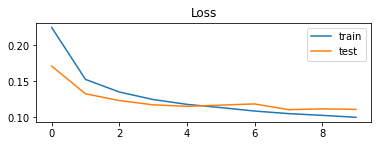

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

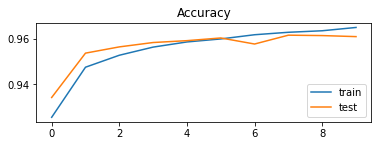

In [ ]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(
      x=test_padded
    , batch_size=128
    , verbose=0
) 

In [ ]:
for i in predictions:
    print(i)
    

In [ ]:
rounded_predictions = np.argmax(predictions, axis=1)

#for i in rounded_predictions:
   # print(i)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
y_test

,eco,ent,int,sprt,state
132559,0,0,1,0,0
275577,0,0,0,0,1
191230,0,0,0,0,1
205435,0,0,0,0,1
362507,0,0,0,0,1
...,...,...,...,...,...
322454,0,0,0,0,1
305973,0,0,0,0,1
323327,0,0,0,0,1
217279,0,0,0,0,1


In [ ]:
for i in y_test:
    print(i)

eco
ent
int
sprt
state


In [ ]:
y_true=np.array(y_test)
y_true[1]

array([0, 0, 0, 0, 1], dtype=uint8)

In [ ]:
cm = confusion_matrix(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['eco','ent', 'int', 'sprt', 'state']

Confusion matrix, without normalization
[[ 3020    10    89    10   696]
 [    2  5563    88    61   256]
 [   22    63  6125    26   188]
 [    5    44    31 10149    66]
 [  644   224   326    71 46964]]


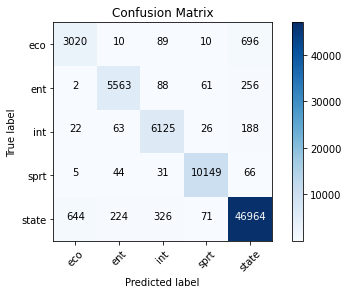

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions, target_names=cm_plot_labels ))

              precision    recall  f1-score   support

         eco       0.82      0.79      0.80      3825
         ent       0.94      0.93      0.94      5970
         int       0.92      0.95      0.94      6424
        sprt       0.98      0.99      0.98     10295
       state       0.97      0.97      0.97     48229

    accuracy                           0.96     74743
   macro avg       0.93      0.93      0.93     74743
weighted avg       0.96      0.96      0.96     74743



BI-LSTM MODEL(100)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(train_padded, y_train, verbose=0)
_, test_acc = model.evaluate(test_padded, y_test, verbose=0)

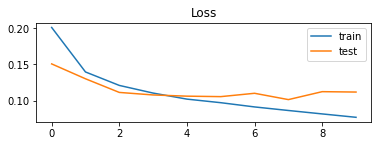

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(historya.history['loss'], label='train')
plt.plot(historya.history['val_loss'], label='test')
plt.legend()

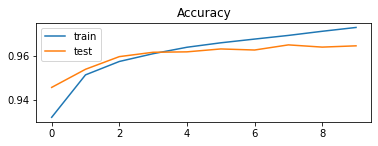

In [ ]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(historya.history['accuracy'], label='train')
plt.plot(historya.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(
      x=test_padded
    , batch_size=128
    , verbose=0
) 
rounded_predictions = np.argmax(predictions, axis=1)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

for i in y_test:
    print(i)

y_true=np.array(y_test)
y_true[1]    

eco
ent
int
sprt
state


In [ ]:
cm = confusion_matrix(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['eco','ent', 'int', 'sprt', 'state']

In [ ]:
cm = confusion_matrix(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions, target_names=cm_plot_labels ))

              precision    recall  f1-score   support

         eco       0.83      0.79      0.81      3825
         ent       0.95      0.94      0.94      5970
         int       0.95      0.94      0.95      6424
        sprt       0.98      0.99      0.99     10295
       state       0.97      0.98      0.98     48229

    accuracy                           0.96     74743
   macro avg       0.94      0.93      0.93     74743
weighted avg       0.96      0.96      0.96     74743

